In [3]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=True)  # 28 x 28 로 되어 있는 흑백이미지

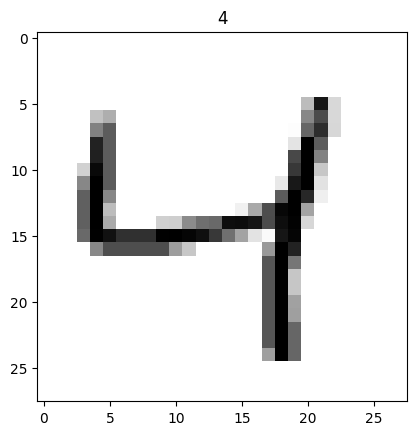

In [31]:
plt.imshow(mnist.data.iloc[2].values.reshape(28,28),cmap='gray_r')
plt.title(mnist.target[2])
plt.show()

In [1]:
28*28

784

<Axes: xlabel='0', ylabel='1'>

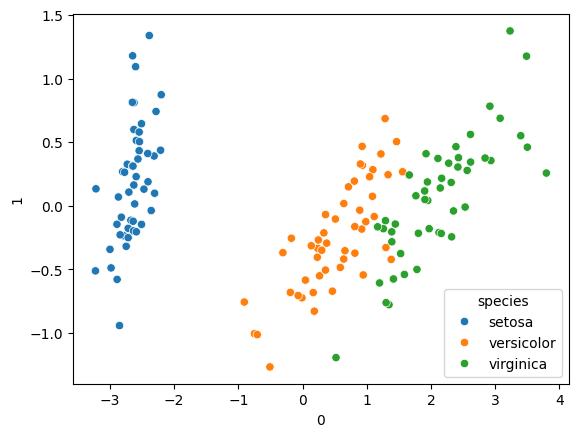

In [29]:
from  sklearn.decomposition import PCA
import seaborn as sns

iris = sns.load_dataset('iris')
X = iris.drop('species',axis=1)
y = iris['species']

pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)
X_PCA

iris =pd.DataFrame(X_PCA)
iris['species'] = y

sns.scatterplot(data=iris, x=0, y=1, hue='species')


In [36]:
# 배열의 누적합
import numpy as np
arr = np.array([1,2,3,4])
print(arr)
cumsum_arr = np.cumsum(arr)
cumsum_arr

[1 2 3 4]


array([ 1,  3,  6, 10])

In [40]:
# 적절한 주성분 개수 찾기 분산이 95% 적당

pca = PCA()
pca.fit(mnist.data)
# 설명된 분산의 누적의 합이 0.95 이상이되는 차원의 개수
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95) +1
d

np.int64(154)

In [44]:
pca = PCA(n_components=0.95)
mnist.data_pca = pca.fit_transform(mnist.data)
pca.n_components_

np.int64(154)

설명된 분산의 시각화

In [47]:
cumsum

array([0.09746116, 0.16901561, 0.23051091, 0.28454476, 0.3334341 ,
       0.37648637, 0.40926898, 0.4381654 , 0.46574904, 0.48917044,
       0.51023733, 0.53061286, 0.5476835 , 0.5646237 , 0.58045752,
       0.59532097, 0.60851456, 0.6213047 , 0.63317742, 0.64470679,
       0.65536719, 0.66546513, 0.67505665, 0.684153  , 0.69298586,
       0.70137405, 0.70947236, 0.71732954, 0.72473217, 0.73163231,
       0.73819375, 0.74464845, 0.75065664, 0.75651276, 0.7621803 ,
       0.767615  , 0.77266217, 0.77753297, 0.78232252, 0.78699846,
       0.79154214, 0.79599132, 0.80017349, 0.80413513, 0.8079722 ,
       0.81173005, 0.81534432, 0.81883456, 0.82222188, 0.82541884,
       0.82858738, 0.83168883, 0.83465363, 0.83752465, 0.84034978,
       0.84304401, 0.84572793, 0.84829303, 0.85082471, 0.85327119,
       0.85566821, 0.85805402, 0.86034636, 0.86255585, 0.86468645,
       0.86674963, 0.86877744, 0.87072779, 0.8726425 , 0.87452799,
       0.87639775, 0.8781988 , 0.87996667, 0.88170025, 0.88334

87 154


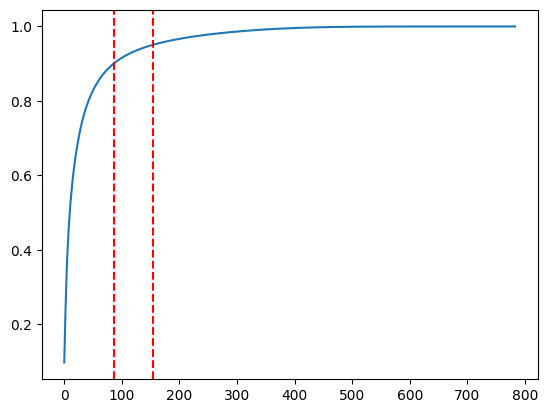

In [51]:
# 설명된 분산의 비율이 95% 또는 90%
pca = PCA()
pca.fit(mnist.data)
# 설명된 분산의 누적의 합이 0.95 이상이되는 차원의 개수
cumsum = np.cumsum(pca.explained_variance_ratio_)
n_component_90 = np.argmax(cumsum >=0.90) +1
n_component_95 = np.argmax(cumsum >=0.95) +1
print(n_component_90, n_component_95)
plt.plot(cumsum)
plt.axvline(x=n_component_90,color='r',linestyle='--')
plt.axvline(x=n_component_95,color='r',linestyle='--')
plt.show()

In [52]:
# 1. pca를 적용하지 않고 전체 특성을 다 사용해서 모델에 적용한 경우
# 2. pca를 적용해서 차원(특성)을 줄이고 모델에 적용

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
rfc = RandomForestClassifier()
x_train,x_test,y_train,y_test = train_test_split(mnist.data, mnist.target, 
                                                 stratify=mnist.target,random_state=42)

In [55]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1726
           1       0.98      0.98      0.98      1969
           2       0.96      0.97      0.96      1748
           3       0.96      0.96      0.96      1785
           4       0.97      0.96      0.97      1706
           5       0.97      0.96      0.96      1578
           6       0.97      0.98      0.98      1719
           7       0.97      0.97      0.97      1823
           8       0.95      0.96      0.96      1706
           9       0.95      0.94      0.94      1740

    accuracy                           0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500



In [68]:
pca_90 = PCA(n_components=0.90)
mnist_pca_90 = pca_90.fit_transform(mnist.data)
x_train,x_test,y_train,y_test = train_test_split(mnist_pca_90, 
                                                 mnist.target,stratify=mnist.target,random_state=42)
rfc = RandomForestClassifier()

In [69]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [70]:
print(classification_report(y_test, rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1726
           1       0.98      0.98      0.98      1969
           2       0.95      0.94      0.95      1748
           3       0.92      0.93      0.93      1785
           4       0.95      0.95      0.95      1706
           5       0.93      0.94      0.94      1578
           6       0.96      0.98      0.97      1719
           7       0.96      0.95      0.96      1823
           8       0.92      0.92      0.92      1706
           9       0.93      0.92      0.92      1740

    accuracy                           0.95     17500
   macro avg       0.95      0.95      0.95     17500
weighted avg       0.95      0.95      0.95     17500



- 하이퍼 파라메터 튜팅
 - 적절할 component 개수
 - 모델의 파라메터

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
pipeline =  Pipeline([    
    ('pca',PCA(random_state=42)),
    ('rfc',RandomForestClassifier(random_state=42))
])
# 하이퍼 파라메터
params = {
    'pca__n_components' : np.arange(10,80),
    'rfc__n_estimators' : np.arange(50,500)
}
rsearch = RandomizedSearchCV(pipeline,params,cv=3,random_state=42)
rsearch.fit(mnist.data[:10000], mnist.target[:10000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('rfc',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [84]:
rsearch.best_params_
best_model = rsearch.best_estimator_
x_train,x_test,y_train,y_test = train_test_split(mnist.data, mnist.target, stratify=mnist.target,random_state=42)
best_model.fit(x_train, y_train)
print(classification_report(y_test, best_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1726
           1       0.98      0.98      0.98      1969
           2       0.96      0.95      0.96      1748
           3       0.93      0.94      0.94      1785
           4       0.95      0.95      0.95      1706
           5       0.94      0.95      0.94      1578
           6       0.96      0.98      0.97      1719
           7       0.96      0.95      0.96      1823
           8       0.93      0.93      0.93      1706
           9       0.94      0.93      0.93      1740

    accuracy                           0.95     17500
   macro avg       0.95      0.95      0.95     17500
weighted avg       0.95      0.95      0.95     17500



In [85]:
rsearch.best_params_

{'rfc__n_estimators': np.int64(304), 'pca__n_components': np.int64(62)}

In [86]:
# 원본이미지 , 주성분 분석한 이미지, 복원한 이미지

Text(0.5, 1.0, 'inverse')

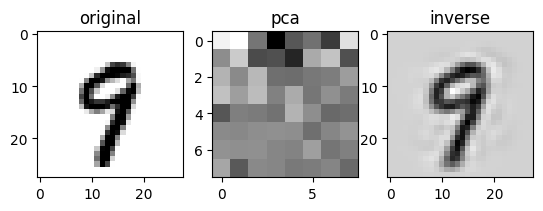

In [123]:
plt.subplot(1,3,1)
plt.imshow(x_train.iloc[0].values.reshape(28,28),cmap='gray_r')
plt.title('original')

plt.subplot(1,3,2)
pca = PCA(n_components=64)
pca_data = pca.fit_transform(x_train)
plt.imshow(pca_data[0].reshape(8,8),cmap='gray_r')
plt.title('pca')

plt.subplot(1,3,3)
pca_data_inverse = pca.inverse_transform(pca_data)
plt.imshow(pca_data_inverse[0].reshape(28,28),cmap='gray_r')
plt.title('inverse')


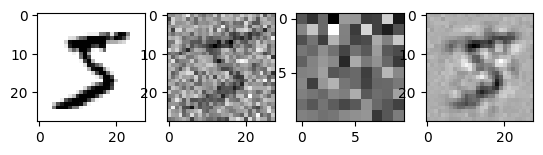

In [148]:
# PCA의 부가적인 기능으로는 주성분을 분석을 통해 차원을 축소하면 주요 특성만 추출되는 효과를 보기때문에
# 약간의 노이즈가 있는경우 주성분 분석한후 inverse했을때 노이즈가 제거되는 효과기 있다
np.random.seed(45)
# 스케일링
X = mnist.data/255.0
noise_rate = 0.5
x_noise = X+noise_rate*np.random.normal(loc=0.0, scale=1.0, size = X.shape)
plt.subplot(1,4,1)
plt.imshow(X.iloc[0].values.reshape(28,28),cmap='gray_r')

plt.subplot(1,4,2)
plt.imshow(x_noise.iloc[0].values.reshape(28,28),cmap='gray_r')


pca = PCA(n_components=100)
x_noise_pca = pca.fit_transform(x_noise)
plt.subplot(1,4,3)
plt.imshow(x_noise_pca[0].reshape(10,10),cmap='gray_r')

plt.subplot(1,4,4)
x_noise_pca_inverse = pca.inverse_transform(x_noise_pca)
plt.imshow(x_noise_pca_inverse[0].reshape(28,28),cmap='gray_r')


- 랜덤 PCA
    - 확률절 알고리즘
        - 매개변수 svd_solver = 'randomized' 지정 d개의 주성분에 대한 근사값을 빠르게 찾는다(일반적인)       
        - 특정상황에서는 더 빠르지 않을수 있다..(mnist end so on..)

In [163]:
rnd_pca = PCA(n_components=100, svd_solver='randomized',random_state=42)


(70000, 784)

In [164]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
 |
 |  Principal component analysis (PCA).
 |
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |
 |  With sparse inputs, the ARPACK implementation of the truncated SVD can be
 |  used (i.e. through :func:`scipy.sparse.linalg.svds`). Alternatively, one
 |  may consider :class:`TruncatedSVD` where the data are not centered.
 |
 |  No

In [160]:
pca = PCA(n_components=2,random_state=42)
pca.fit_transform(numeric_titanic)

array([[-27.65932315,  -6.92640568],
       [ 36.82070255,   7.26504999],
       [-26.87058019,  -2.93182499],
       ...,
       [ -4.98743766, -10.51925472],
       [ -4.78801795,  -3.52539453],
       [-26.87705173,   3.07148502]])